<a href="https://colab.research.google.com/github/Tiru-Kaggundi/Trade_Stuff/blob/main/IES_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pandas as pd
from google.colab import files
import numpy as np

In [ ]:
# download the file from Google Drive
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
# read the excel file from drive into a Pandas DataFrame
df = pd.read_excel("/content/gdrive/MyDrive/IES_Claim_File.xlsx")
print(df.columns)
print(df.shape)
df.head()

Index(['IEC_Number', 'bank_name', 'UIN_NO', 'SUBVENTION_RATE_OF_INTEREST',
       'TOTAL_LOAN_AMOUNT_DISBURSED_INR', 'LOAN_TENURE_IN_MONTH',
       'PRIOR_SUBVENTION_RATE_OF_INTEREST',
       'AFTER_SUBVENTION_RATE_OF_INTEREST', 'NET_SUBVENTION_VALUE_INR',
       'MSEME_NONMSME', 'IS_APPLICANT', 'IS_APPLICANT_NE_STATE'],
      dtype='object')
(589281, 12)


,IEC_Number,bank_name,UIN_NO,SUBVENTION_RATE_OF_INTEREST,TOTAL_LOAN_AMOUNT_DISBURSED_INR,LOAN_TENURE_IN_MONTH,PRIOR_SUBVENTION_RATE_OF_INTEREST,AFTER_SUBVENTION_RATE_OF_INTEREST,NET_SUBVENTION_VALUE_INR,MSEME_NONMSME,IS_APPLICANT,IS_APPLICANT_NE_STATE
0,493021019,KARNATAKA BANK LIMITED,IES00010394AM23,3.0,15000.0,270,10.11,7.11,1.0,MSME,NaN,No
1,509041256,KARNATAKA BANK LIMITED,IES00011483AM23,3.0,15000.0,270,11.83,8.83,1.0,MSME,NaN,No
2,502052619,PUNJAB NATIONAL BANK,IES00017072AM23,3.0,21195.0,1,7.80,4.80,1.0,MSME,NaN,No
3,3211000721,KARUR VYSYA BANK,IES00017568AM23,3.0,300000.0,120,10.35,7.35,1.0,MSME,NaN,No
4,3217507533,AXIS BANK,IES00000870AM23,3.0,500000.0,7,8.35,5.35,1.0,NON-MSME,NaN,No


In [ ]:
df = df.loc[df["SUBVENTION_RATE_OF_INTEREST"].isin([0.02, 0.03, 2.0, 3.0])]
print(df.shape)

(587780, 12)


In [ ]:
columns_to_multiply = ["SUBVENTION_RATE_OF_INTEREST", "PRIOR_SUBVENTION_RATE_OF_INTEREST", "AFTER_SUBVENTION_RATE_OF_INTEREST"]
#df.loc[df["SUBVENTION_RATE_OF_INTEREST"].isin([0.02, 0.03]), columns_to_multiply] *= 100
percentaged_df = df.copy()
percentaged_df.loc[df["SUBVENTION_RATE_OF_INTEREST"].isin([0.02, 0.03]),columns_to_multiply] *= 100
print(percentaged_df.shape)

(587780, 12)


In [ ]:
#Remove outliers where percentage of interest before subvention is greater than 18 percent - there are some 300 of such cases
df_final = percentaged_df[percentaged_df["PRIOR_SUBVENTION_RATE_OF_INTEREST"] <= 18]
print(df_final.shape)
df_final.head()

(587588, 12)


,IEC_Number,bank_name,UIN_NO,SUBVENTION_RATE_OF_INTEREST,TOTAL_LOAN_AMOUNT_DISBURSED_INR,LOAN_TENURE_IN_MONTH,PRIOR_SUBVENTION_RATE_OF_INTEREST,AFTER_SUBVENTION_RATE_OF_INTEREST,NET_SUBVENTION_VALUE_INR,MSEME_NONMSME,IS_APPLICANT,IS_APPLICANT_NE_STATE
0,493021019,KARNATAKA BANK LIMITED,IES00010394AM23,3.0,15000.0,270,10.11,7.11,1.0,MSME,NaN,No
1,509041256,KARNATAKA BANK LIMITED,IES00011483AM23,3.0,15000.0,270,11.83,8.83,1.0,MSME,NaN,No
2,502052619,PUNJAB NATIONAL BANK,IES00017072AM23,3.0,21195.0,1,7.80,4.80,1.0,MSME,NaN,No
3,3211000721,KARUR VYSYA BANK,IES00017568AM23,3.0,300000.0,120,10.35,7.35,1.0,MSME,NaN,No
4,3217507533,AXIS BANK,IES00000870AM23,3.0,500000.0,7,8.35,5.35,1.0,NON-MSME,NaN,No


In [ ]:
banks_grouped = df_final.groupby("bank_name")["PRIOR_SUBVENTION_RATE_OF_INTEREST"].mean().round(2)
banks_grouped.to_excel("bank_with_mean_interest_rates_before_subvention.xlsx")

In [ ]:
banks_grouped_value = df_final.groupby("bank_name")["NET_SUBVENTION_VALUE_INR"].sum().round(0)
banks_grouped_value.to_excel("bank_with_net_subvention_value_total.xlsx")

The above is the finalized clean dataset. It contains  interest values upto 18 percent as there were very few above this and were skewing the dataset. The total number of values for analysis is 587588

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


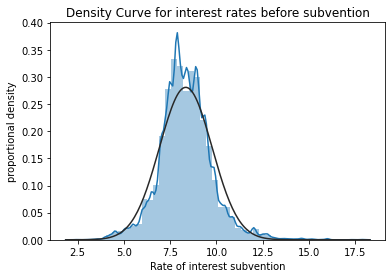

In [ ]:
# select the column you want to plot
column = df_final["PRIOR_SUBVENTION_RATE_OF_INTEREST"]

# plot the normal distribution curve using seaborn
ax = sns.distplot(column, fit=norm)

# add labels and title to the plot

ax.set_xlabel("Rate of interest subvention")
ax.set_ylabel("proportional density")
ax.set_title("Density Curve for interest rates before subvention")
fig = ax.get_figure()
fig.savefig('norm_dist.png', dpi=300)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


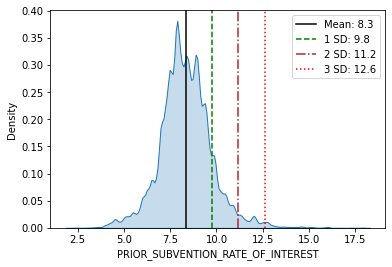

In [ ]:
ax = sns.distplot(df_final["PRIOR_SUBVENTION_RATE_OF_INTEREST"], hist=False, kde=True,
             kde_kws = {'shade': True})

mean = df_final["PRIOR_SUBVENTION_RATE_OF_INTEREST"].mean()
std = df_final["PRIOR_SUBVENTION_RATE_OF_INTEREST"].std()

sd1 = "{:.1f}".format(mean + std)
sd2 = "{:.1f}".format(mean + 2*std)
sd3 = "{:.1f}".format(mean + 3*std)
meanf = "{:.1f}".format(mean)
ax.axvline(x=mean, color='black', label=str('Mean: ' + meanf))
ax.axvline(x=mean + 1*std, color='green', linestyle='dashed', label=str("1 SD: " + sd1))
ax.axvline(x=mean + 2*std, color='brown', linestyle='dashdot', label=str("2 SD: " + sd2))
ax.axvline(x=mean + 3*std, color='red', linestyle='dotted', label=str("3 SD: " + sd3))

ax.legend()

fig = ax.get_figure()
fig.savefig('sd_dist.png', dpi=300)

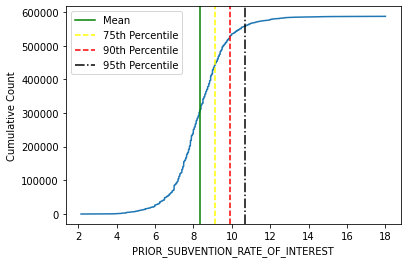

In [ ]:
column_values = df_final["PRIOR_SUBVENTION_RATE_OF_INTEREST"].sort_values()
cumulative_count = column_values.value_counts().sort_index().cumsum()

plt.plot(cumulative_count.index, cumulative_count.values)
plt.xlabel("PRIOR_SUBVENTION_RATE_OF_INTEREST")
plt.ylabel('Cumulative Count')

mean = df_final["PRIOR_SUBVENTION_RATE_OF_INTEREST"].mean()
percentile_75 = df_final["PRIOR_SUBVENTION_RATE_OF_INTEREST"].quantile(0.75)
percentile_90 = df_final["PRIOR_SUBVENTION_RATE_OF_INTEREST"].quantile(0.90)
percentile_95 = df_final["PRIOR_SUBVENTION_RATE_OF_INTEREST"].quantile(0.95)
plt.axvline(mean, color='green', label='Mean', linestyle='solid')
plt.axvline(percentile_75, color='yellow', linestyle='dashed', label='75th Percentile')
plt.axvline(percentile_90, color='red', linestyle='dashed', label='90th Percentile')
plt.axvline(percentile_95, color='black', linestyle='dashdot', label='95th Percentile')
plt.legend()
plt.savefig('cumsum_main.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
df_final.columns

Index(['IEC_Number', 'bank_name', 'UIN_NO', 'SUBVENTION_RATE_OF_INTEREST',
       'TOTAL_LOAN_AMOUNT_DISBURSED_INR', 'LOAN_TENURE_IN_MONTH',
       'PRIOR_SUBVENTION_RATE_OF_INTEREST',
       'AFTER_SUBVENTION_RATE_OF_INTEREST', 'NET_SUBVENTION_VALUE_INR',
       'MSEME_NONMSME', 'IS_APPLICANT', 'IS_APPLICANT_NE_STATE'],
      dtype='object')

In [ ]:
df_int1 = df_final.copy()
df_int1["bank_name"] = df_int1["bank_name"].str.upper()
grouped = df_int1.groupby("bank_name")["NET_SUBVENTION_VALUE_INR"].sum()
result = pd.DataFrame({'Name of the Bank': grouped.index, 'Total subvention value': grouped.values})
cum_value_banks = result.sort_values(by = "Total subvention value", ascending=False)
cum_value_banks.to_excel("Bank_cumvalue.xlsx")

Now we shall do the above analysis for MSME Sector in the below
set of code pieces

In [ ]:
df_final["MSEME_NONMSME"].unique()

array(['MSME', 'NON-MSME', nan], dtype=object)

In [ ]:
# total value of loan taken by msmes
msme_loans = df_final.loc[df_final["MSEME_NONMSME"] == "MSME", 'TOTAL_LOAN_AMOUNT_DISBURSED_INR'].sum()
msme_loans

10091159595209.592

In [ ]:
# total value of loan taken by non-msmes
non_msme_loans = df_final.loc[df_final["MSEME_NONMSME"] != "MSME", 'TOTAL_LOAN_AMOUNT_DISBURSED_INR'].sum()
non_msme_loans

5329664002497.158

In [ ]:
# total value of subvention taken by msmes
msme_sub = df_final.loc[df_final["MSEME_NONMSME"] == "MSME", 'NET_SUBVENTION_VALUE_INR'].sum()
msme_sub

11408922494.262001

In [ ]:
# total value of subvention taken by non-msmes
non_msme_sub = df_final.loc[df_final["MSEME_NONMSME"] != "MSME", 'NET_SUBVENTION_VALUE_INR'].sum()
non_msme_sub

6198235389.658999

In [ ]:
percentage_msme_sub = msme_sub/(msme_sub+non_msme_sub) * 100
percentage_msme_sub

64.79707042713987

In [ ]:
df_msme = df_final[df_final["MSEME_NONMSME"] == "MSME"]
df_nonmsme = df_final[df_final["MSEME_NONMSME"] != "MSME"]
print(df_msme.shape)
print(df_nonmsme.shape)

(448745, 12)
(138843, 12)


Now let's find how many unique exporters take these benefits under MSME and non MSME categories

In [ ]:
print("Unique MSMEs: ", df_msme["IEC_Number"].nunique())
print("Unique Non-MSMEs: ", df_nonmsme["IEC_Number"].nunique())

Unique MSMEs:  7599
Unique Non-MSMEs:  2188


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


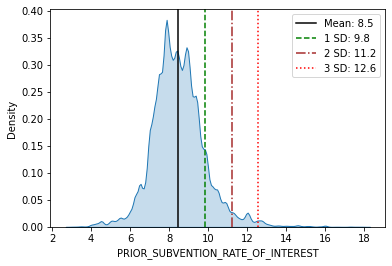

In [ ]:
# Plotting for MSMEs alone
ax = sns.distplot(df_msme["PRIOR_SUBVENTION_RATE_OF_INTEREST"], hist=False, kde=True,
             kde_kws = {'shade': True})

mean = df_msme["PRIOR_SUBVENTION_RATE_OF_INTEREST"].mean()
std = df_msme["PRIOR_SUBVENTION_RATE_OF_INTEREST"].std()

sd1 = "{:.1f}".format(mean + std)
sd2 = "{:.1f}".format(mean + 2*std)
sd3 = "{:.1f}".format(mean + 3*std)
meanf = "{:.1f}".format(mean)
ax.axvline(x=mean, color='black', label=str('Mean: ' + meanf))
ax.axvline(x=mean + 1*std, color='green', linestyle='dashed', label=str("1 SD: " + sd1))
ax.axvline(x=mean + 2*std, color='brown', linestyle='dashdot', label=str("2 SD: " + sd2))
ax.axvline(x=mean + 3*std, color='red', linestyle='dotted', label=str("3 SD: " + sd3))

ax.legend()

fig = ax.get_figure()
fig.savefig('sd_msme.png', dpi=300)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


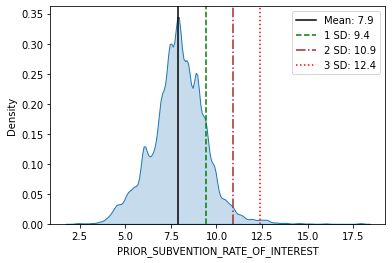

In [ ]:
# Plotting for Non MSMEs alone
ax = sns.distplot(df_nonmsme["PRIOR_SUBVENTION_RATE_OF_INTEREST"], hist=False, kde=True,
             kde_kws = {'shade': True})

mean = df_nonmsme["PRIOR_SUBVENTION_RATE_OF_INTEREST"].mean()
std = df_nonmsme["PRIOR_SUBVENTION_RATE_OF_INTEREST"].std()

sd1 = "{:.1f}".format(mean + std)
sd2 = "{:.1f}".format(mean + 2*std)
sd3 = "{:.1f}".format(mean + 3*std)
meanf = "{:.1f}".format(mean)
ax.axvline(x=mean, color='black', label=str('Mean: ' + meanf))
ax.axvline(x=mean + 1*std, color='green', linestyle='dashed', label=str("1 SD: " + sd1))
ax.axvline(x=mean + 2*std, color='brown', linestyle='dashdot', label=str("2 SD: " + sd2))
ax.axvline(x=mean + 3*std, color='red', linestyle='dotted', label=str("3 SD: " + sd3))

ax.legend()

fig = ax.get_figure()
fig.savefig('sd_nonmsme.png', dpi=300)

We will now do some analysis based on values of loans given

In [ ]:
print(df_msme.shape)
df_msme.columns

(448745, 12)


Index(['IEC_Number', 'bank_name', 'UIN_NO', 'SUBVENTION_RATE_OF_INTEREST',
       'TOTAL_LOAN_AMOUNT_DISBURSED_INR', 'LOAN_TENURE_IN_MONTH',
       'PRIOR_SUBVENTION_RATE_OF_INTEREST',
       'AFTER_SUBVENTION_RATE_OF_INTEREST', 'NET_SUBVENTION_VALUE_INR',
       'MSEME_NONMSME', 'IS_APPLICANT', 'IS_APPLICANT_NE_STATE'],
      dtype='object')

In [ ]:
df_msme.shape

(448745, 12)

In [ ]:
df_msme["TOTAL_LOAN_AMOUNT_DISBURSED_INR"].mean()


22487514.279177688

In [ ]:
df_nonmsme["TOTAL_LOAN_AMOUNT_DISBURSED_INR"].mean()

38386263.63948602

In [ ]:
df_int2 = df_msme.copy()
grouped = df_int2.groupby("IEC_Number")["TOTAL_LOAN_AMOUNT_DISBURSED_INR"].sum()
result = pd.DataFrame({'IEC': grouped.index, 'Loan value': grouped.values})
cum_loan = result.sort_values(by = "Loan value", ascending=False)
#cum_loan.to_excel("msme_loan_values.xlsx")
print(result["Loan value"].sum())

10091159595209.594


In [ ]:
df_int3 = df_nonmsme.copy()
grouped = df_int3.groupby("IEC_Number")["TOTAL_LOAN_AMOUNT_DISBURSED_INR"].sum()
result = pd.DataFrame({'IEC': grouped.index, 'Loan value': grouped.values})
cum_loan = result.sort_values(by = "Loan value", ascending=False)
print(result["Loan value"].sum())
#cum_loan.to_excel("nonmsme_loan_values.xlsx")

5329664002497.158


In [ ]:
print("MSME percent:",5329664002497.158/(5329664002497.158+10091159595209.594))
print("Non MSME percent share:", 10091159595209.594/(5329664002497.158+10091159595209.594))

MSME percent: 0.3456147441625452
Non MSME percent share: 0.6543852558374549


In [ ]:
df_int4_alt = df_msme.copy()
df_int4 = df_int4_alt[df_int4_alt["NET_SUBVENTION_VALUE_INR"] > 0]
grouped = df_int4.groupby("IEC_Number")["NET_SUBVENTION_VALUE_INR"].sum()
result = pd.DataFrame({'IEC': grouped.index, 'Subvention value': grouped.values})
cum_loan = result.sort_values(by = "Subvention value", ascending=False)
cum_loan.to_excel("msme_net_subvention_values.xlsx")
print(result["Subvention value"].sum())

11416199884.236


In [ ]:
df_int5_alt = df_nonmsme.copy()
df_int5 = df_int5_alt[df_int5_alt["NET_SUBVENTION_VALUE_INR"] > 0]
grouped = df_int5.groupby("IEC_Number")["NET_SUBVENTION_VALUE_INR"].sum()
result = pd.DataFrame({'IEC': grouped.index, 'Subvention value': grouped.values})
cum_loan = result.sort_values(by = "Subvention value", ascending=False)
cum_loan.to_excel("non_msme_net_subvention_values.xlsx")
print(result["Subvention value"].sum())

6204940629.546


In [ ]:
print("MSME percent share in subvention:",11416199884/(11416199884+6204940629))
print("Non MSME percent share:", 6204940629/(11416199884+6204940629))

MSME percent share in subvention: 0.6478695221559408
Non MSME percent share: 0.35213047784405915


*11408922494* 6198235389.659